# Xuemei Chen HW4

## Python A

In [18]:
import pandas as pd
import numpy as np
import random

In [2]:
path = "./data/"

In [3]:
# this will extract the x and y column from the file
def Extract_x_y(filename):
    df = pd.read_csv(path + filename + '.txt', header = 0)  #first row is header
    nrow = df.shape[0]  #number of data points
    y = df['y'].values.reshape(nrow,1)
    x = df['x'].values.reshape(nrow,1)
    return x,y

In [4]:
def LSLF(filename):
    x,y = Extract_x_y(filename)
    A = np.hstack((np.ones([len(x),1]),x))  #Setting up Ax=y
    LSS = np.linalg.solve(A.T@A, A.T@y) #compute the least squares solution
    #returns intercept, slope, error
    return LSS[0][0], LSS[1][0], sum((y-A@LSS)**2)[0]

## Python B: test

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
#write a function that will generate plots
def PlotGenerator(filename):
    
    x,y = Extract_x_y(filename)
    
    plt.scatter(x,y)
    xrange = max(x) - min(x)
    xv = np.arange(min(x)-xrange/10,max(x)+xrange/10,0.05)
    
    b,m,_ = LSLF(filename)
    plt.plot(xv, b+m*xv)
    plt.title(filename)
    plt.show()

In [7]:
import statsmodels.api as sm

/Users/xchen98/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
#write a function that compares with python's statsmodels
def CompareStats(filename):
    x,y = Extract_x_y(filename)
    x = sm.add_constant(x) #add intercept
    model = sm.OLS(y,x)
    results = model.fit()
    print('The intercept and slope from statsmodels is',results.params,'.')
    print('The intercept and slope from my own program is',LSLF(filename)[:2],'.')

### There are obviously a lot of statistical functionality in the ols function, but we will not discuss them here.

### Test on TVlife

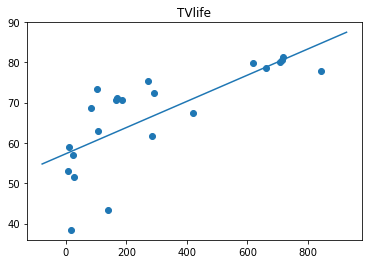

In [9]:
PlotGenerator('TVlife')

####  It does not seem appropriate to assume a linear relationship.

In [10]:
CompareStats('TVlife')

The intercept and slope from statsmodels is [  5.73368987e+01   3.24353736e-02] .
The intercept and slope from my own program is (57.336898734818838, 0.032435373622846216) .


### Test on population

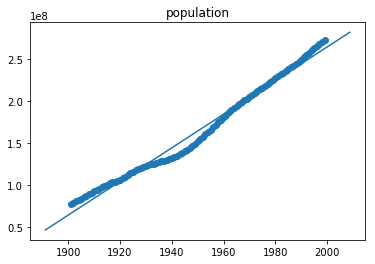

In [11]:
PlotGenerator('population')

####  It seems appropriate to assume a linear relationship.

In [12]:
CompareStats('population')

The intercept and slope from statsmodels is [ -3.74076738e+09   2.00258709e+06] .
The intercept and slope from my own program is (-3740767381.4605389, 2002587.0905133039) .


### Test on nba

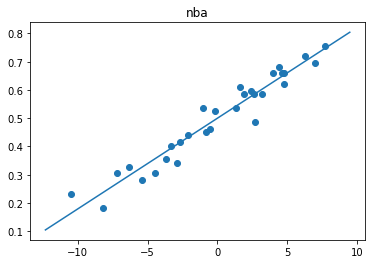

In [13]:
PlotGenerator('nba')

####  It seems appropriate to assume a linear relationship.

In [14]:
CompareStats('nba')

The intercept and slope from statsmodels is [ 0.50003333  0.03210729] .
The intercept and slope from my own program is (0.50003333333333333, 0.032107292591119135) .


## Python C

### (a) Rewrite loss function in matrix form

Let $X=\begin{bmatrix}x_{11}&\cdots&x_{1,n-1}\\
\vdots&&\vdots\\
x_{m1}&\cdots&x_{m,n-1}\end{bmatrix}$ be the $m\times(n-1)$ data matrix with all the $x$ variables. Let $A=[1,X]$ be the $m\times n$ matrix where '1' is a whole column of 1's.

This way, the $i$th coordinate of $y-Aw$ is exactly $y_i-w_0-\sum_{j=1}^{n-1}w_jx_{ij}$, so

$L(w)=\sum_{i=1}^m(y_i-w_0-\sum_{j=1}^{n-1}w_ix_{ij})^2=\|Aw-y\|^2$

### (b)

In [1]:
#parameters:
#df is a data frame whose first n-1 columns are x_1,...,x_{n-1}, last column is y
#r is the ratio of training

#returns:
#w is the weights
#loss on testing data
def MyReg(df, r):
    m,n = df.shape
    mt = np.floor(r*m).astype(int) #number of training data
    # create a random set of indices whose cardinality is mt
    tnIdx = random.sample(range(m),mt)
    
    #testing data index
    tsIdx = list(set(range(m)) - set(tnIdx))
    
    #get training data
    Xtn = df.iloc[tnIdx,:n-1].values
    ytn = df.iloc[tnIdx,-1].values
    
    #get test data
    Xts = df.iloc[tsIdx,:n-1].values
    yts = df.iloc[tsIdx,-1].values
    
    #get weights using training data
    A = np.hstack((np.ones([mt,1]), Xtn))
    w = np.linalg.solve(A.T@A, A.T@ytn)
    
    #computing loss on testing data
    Ats = np.hstack((np.ones([m-mt,1]), Xts))
    L = np.linalg.norm(Ats@w - yts)
    return w, L**2

In [27]:
nbadf = pd.read_csv(path + 'nba.txt', header = 0) 

In [28]:
print(nbadf)

                      Team  Games  Wins  Losses  WinPct  turnovers    pts  \
0            Atlanta Hawks     82    38      44   0.463       15.3  101.0   
1           Boston Celtics     82    25      57   0.305       15.4   96.2   
2            Brooklyn Nets     82    44      38   0.537       14.5   98.5   
3        Charlotte Bobcats     82    43      39   0.524       12.3   96.9   
4            Chicago Bulls     82    48      34   0.585       14.9   93.7   
5      Cleveland Cavaliers     82    33      49   0.402       14.2   98.2   
6         Dallas Mavericks     82    49      33   0.598       13.5  104.8   
7           Denver Nuggets     82    36      46   0.439       15.9  104.4   
8          Detroit Pistons     82    29      53   0.354       14.5  101.0   
9    Golden State Warriors     82    51      31   0.622       15.2  104.3   
10         Houston Rockets     82    54      28   0.659       16.1  107.7   
11          Indiana Pacers     82    56      26   0.683       15.1   96.7   

In [32]:
#take the 4 columns that needs to be processed
newdf = nbadf[['turnovers','pts','PM','WinPct']];print(newdf)

    turnovers    pts    PM  WinPct
0        15.3  101.0  -0.5   0.463
1        15.4   96.2  -4.5   0.305
2        14.5   98.5  -1.0   0.537
3        12.3   96.9  -0.2   0.524
4        14.9   93.7   1.9   0.585
5        14.2   98.2  -3.3   0.402
6        13.5  104.8   2.4   0.598
7        15.9  104.4  -2.1   0.439
8        14.5  101.0  -3.7   0.354
9        15.2  104.3   4.8   0.622
10       16.1  107.7   4.6   0.659
11       15.1   96.7   4.4   0.683
12       13.9  107.9   7.0   0.695
13       15.1  103.0  -6.3   0.329
14       13.7   96.1   1.6   0.610
15       14.8  102.2   4.8   0.659
16       15.1   95.5  -8.2   0.183
17       13.9  106.9   2.7   0.488
18       13.8   99.7  -2.7   0.415
19       13.0   98.6  -0.8   0.451
20       15.3  106.2   6.3   0.720
21       14.9   96.5  -5.4   0.280
22       16.9   99.5 -10.5   0.232
23       15.3  105.2   2.6   0.585
24       13.7  106.7   4.0   0.659
25       15.2  100.5  -2.9   0.341
26       14.4  105.4   7.7   0.756
27       14.1  101.3

In [60]:
MyReg(newdf,0.1)

(array([ 1.50554432, -0.0864635 ,  0.00320366,  0.03937743]),
 0.46226651047364326)

In [61]:
MyReg(newdf,0.2)

(array([ 1.12211614,  0.02210104, -0.00922441,  0.0369331 ]),
 0.065400550091515658)

In [62]:
MyReg(newdf,0.3)

(array([ 1.06383786, -0.01441644, -0.00355908,  0.0401019 ]),
 0.077855591387594833)

### (c) Plot

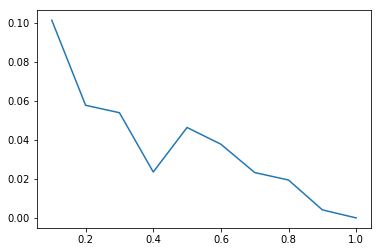

In [71]:
R = np.arange(0.1,1.1,0.1)
Loss = np.zeros(len(R))
for i in range(len(R)):
    Loss[i] = MyReg(newdf,R[i])[1]
plt.plot(R,Loss)
plt.show()

Due to randomness, you may get very different plots, but it should be decreasing overall.